In [24]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from source.conversation_helper import conversation_filter
from source.visualization_helper import init_plot_style

In [25]:
init_plot_style()

In [6]:
ds = pd.read_csv('/Users/john/data/twitter/tweets_ec_nd_conv.csv', usecols=['id', 'screen_name', 'text', 'hashtags','num_replies', 'conversation_id'])
ds.shape

(2716464, 6)

In [7]:
conv = conversation_filter(ds)
conv.shape

(914381, 8)

# text

In [8]:
conv['textlen'] = conv.text.str.len();

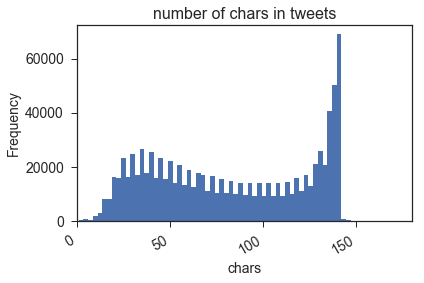

In [9]:
#textlen=ds.groupby('textlen').size()
#textlen.reset_index(inplace=True)
fig = plt.figure()
conv.textlen.plot.hist( bins=100)
#plt.xscale('log')
plt.title('number of chars in tweets')
plt.xlabel('chars')
plt.xlim([0, 180])
#plt.xscale('log')
fig.autofmt_xdate()

# hashtags

In [12]:
s = conv["hashtags"].str.split(';', expand=True).stack()

In [13]:
i = s.index.get_level_values(0)
s.index = s.index.droplevel(-1)
ds_hashtags = ds[['id']].loc[i].copy()
ds_hashtags['hashtags'] = s.values
ds_hashtags.head()

,id,hashtags
0,838977507487547393,VoyACNCOconDNA
1,838977593403666432,VoyACNCOconDNA
2,838978411460767745,VoyACNCOconDNA
3,838997472966021120,VoyACNCOconDNA
4,838999765996224512,VoyACNCOconDNA


In [15]:
perc = ds_hashtags.id.nunique() / ds.shape[0]
print(perc)

0.03474737747306793


In [16]:
ht=ds_hashtags.groupby('hashtags').size()
top=ht.sort_values(ascending=False).head(50)

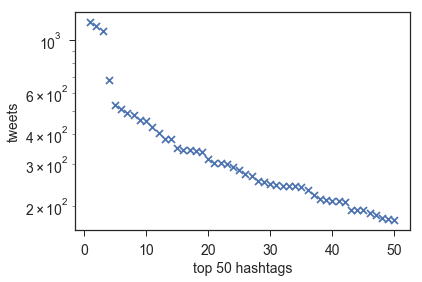

In [17]:
x=range(1, len(top)+1,1)
y=top.values
plt.scatter(x, y, marker='x')
plt.yscale('log')
plt.xlabel('top 50 hashtags')
plt.ylabel('tweets')

In [18]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import re

use_stemmer = False
stemmer = SnowballStemmer("spanish")
stopset = set(stopwords.words('english') + stopwords.words('spanish'))

def tokenize(text):
    text = re.sub(r"(?:\#|@|https?\://)\S+", "", text)
    text = re.sub("[^a-zA-Z] ","",text)
    text = re.sub(r'\b\w{1,2}\b',' ',text)
    text = re.sub(r'http[\bs]*',' ',text)
    tokens = word_tokenize(text)
    if use_stemmer:
        tokens = [stemmer.stem(t) for t in tokens]
    return tokens

words = ' '.join(conv['text'])

use_stemmer=False
word_list = tokenize(words)
word_list = [word for word in word_list if word not in stopset]
print(f'number of words with stop words removal: {len(word_list)}')


wds = pd.DataFrame(word_list)
wds.columns = ['word']
wds=wds.word.value_counts().reset_index()
wds.columns=['word', 'count']
wds=wds[wds['count']>3]
print(f'number of words (TF min:3): {len(wds)}')

number of words with stop words removal: 4982412
number of words (TF min:3): 86441


In [19]:
wds2=wds.sort_values('count', ascending=False).head(1000)

(-0.5, 499.5, 299.5, -0.5)

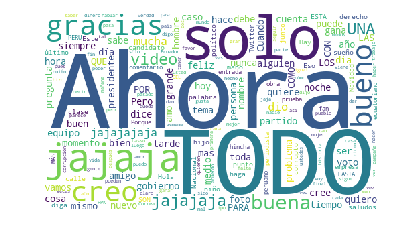

In [20]:
from wordcloud import WordCloud
filtered_words = ' '.join(wds2.word)
wordcloud = WordCloud(background_color='white', width=500, height=300).generate(filtered_words)
plt.imshow(wordcloud)
plt.axis("off")

# text analysis

In [21]:
questions=conv[conv.text.str.endswith('?')]
print(questions.shape)
questions.head()

(47728, 9)


,id,screen_name,text,hashtags,conversation_id,num_replies,num_users,num_tweets,textlen
75,838952408432717825,Denissecnco,@DnaGlobalEvents ¿cuantos ganadores van a ser?...,NaN,838920932982992896,94,17,94,103
89,839505866483183616,gene_cncowner,@DnaGlobalEvents una pregunta .Hoy dirán a la ...,NaN,838920932982992896,94,17,94,55
93,838922043160657920,holyxcnco,@DnaGlobalEvents hasta cuando se puede partici...,NaN,838920932982992896,94,17,94,81
96,838977783133048836,xbroknheartsgox,@sheeilala_ jajajaja eres de mexico no??,NaN,838970516031537152,10,2,10,40
98,838975825923932161,xbroknheartsgox,@sheeilala_ jajajajaja que dia eres ; hermana ...,NaN,838970516031537152,10,2,10,61


In [22]:
admiration=conv[conv.text.str.endswith('!')]
print(admiration.shape)
admiration.head()

(40091, 9)


,id,screen_name,text,hashtags,conversation_id,num_replies,num_users,num_tweets,textlen
97,838974538574614529,xbroknheartsgox,@sheeilala_ si!!! supongo q tu tambien!!!,NaN,838970516031537152,10,2,10,41
105,838975142306938880,sheeilala_,@xbroknheartsgox Siiiiiiiiiii!!!!!!,NaN,838970516031537152,10,2,10,35
218,838972229731946496,xbroknheartsgox,"@pudinilla el ""awwwww"" yo lo tomaba asi como ""...",NaN,838970636244484097,15,2,15,85
220,838975659590418437,xbroknheartsgox,@pudinilla que bueno que sea mutuo porque imag...,NaN,838970636244484097,15,2,15,85
229,838978467928682496,chicade1994,"@xbroknheartsgox Jajajajajajajajaja ""no tengo ...",NaN,838970636244484097,15,2,15,122


In [23]:
suspense=conv[conv.text.str.endswith('..')]
print(suspense.shape)
suspense.head()

(22491, 9)


,id,screen_name,text,hashtags,conversation_id,num_replies,num_users,num_tweets,textlen
219,838973249451081728,xbroknheartsgox,@pudinilla -_- ; te odio....,NaN,838970636244484097,15,2,15,28
237,838979377488670720,el_flacotirador,@danielg195 a cocachos aprendí...,NaN,838959074846728192,2,2,2,33
247,838980024543948804,HOMBRE_AZUL_PE,@Politico_pe NO VA A HACER CASO....\nA CIERTA ...,NaN,838977525174849536,2,2,2,113
271,838953611707236355,EstefyRey,@merianmadeleine @MashiRafael @viviana_bonilla...,NaN,838926562124779520,17,3,17,105
286,838953859477307392,a1ejandro_az,@huyrol promoción estaba en pretemporada..esto...,NaN,837757300874051584,3,2,3,71
